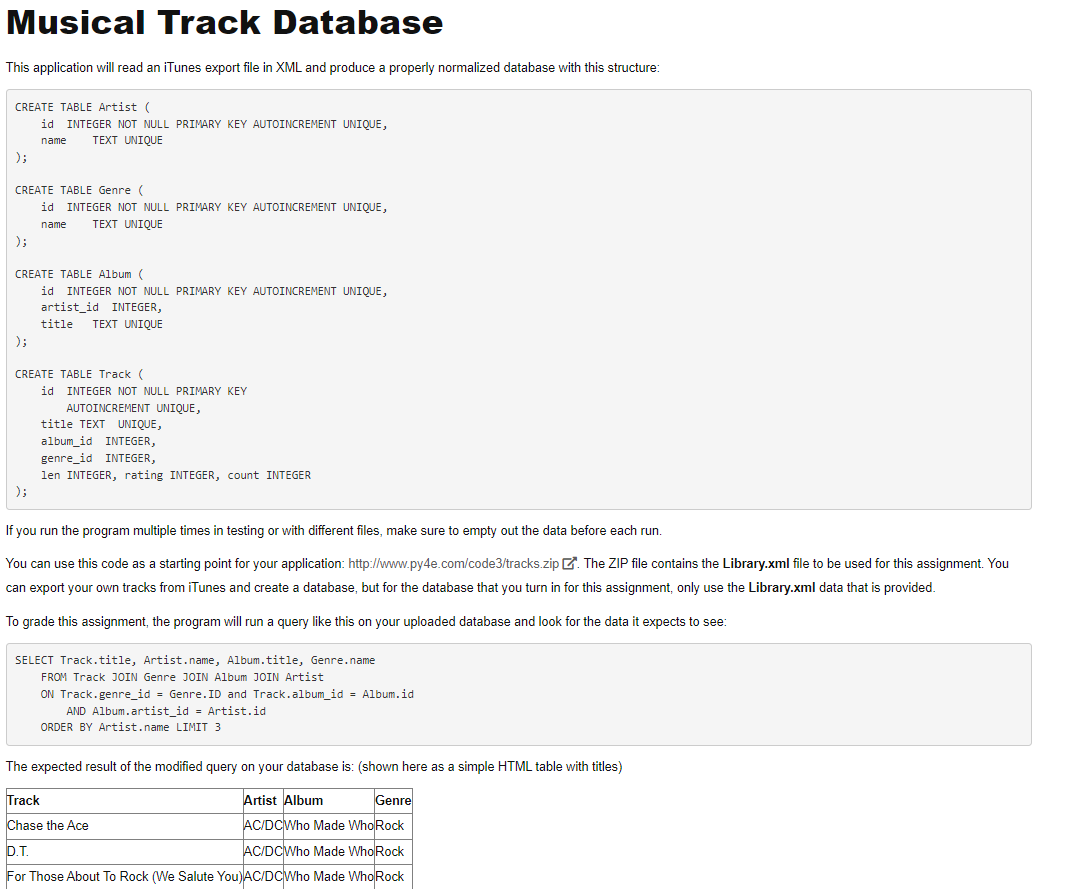

In [13]:
import xml.etree.ElementTree as ET
import sqlite3

conn = sqlite3.connect('tracksdb.sqlite')
curr = conn.cursor()

# Making fresh tables using executescript()
curr.executescript('''
        DROP TABLE IF EXISTS Artist;
        DROP TABLE IF EXISTS Genre;
        DROP TABLE IF EXISTS Album;
        DROP TABLE IF EXISTS Track;

        CREATE TABLE ARTIST (
           id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
           name TEXT UNIQUE
        );
        
        CREATE TABLE Genre (
           id  INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
           name TEXT UNIQUE
        );

        CREATE TABLE Album (
           id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
           artist_id NUMBER,
           title TEXT UNIQUE
        );

        CREATE TABLE Track (
           id INTEGER NOT NULL PRIMARY KEY AUTOINCREMENT UNIQUE,
           title NUMBER UNIQUE,
           album_id NUMBER,
           genre_id NUMBER,
           len NUMBER,
           rating NUMBER,
           count INTEGER
        );
''')

fname = input('Enter the file name:')
if len(fname) < 1 : fname = 'tracks/Library.xml'
    
# <key>Track ID</key><integer>369</integer>
# <key>Name</key><string>Another One Bites The Dust</string>
# <key>Artist</key><string>Queen</string>

#this above data is what we want to retieve from the XML file.

def lookup(d, key):
    found = False
    for child in d:
        if found : return child.text
        if child.tag == 'key' and child.text == key :
            found = True
    return None

stuff = ET.parse(fname)
all = stuff.findall('dict/dict/dict')
print ('Dict found:', len(all))

for entry in all:
    if ( lookup(entry, 'Track ID') is None ) : continue
    name = lookup(entry, 'Name')
    artist = lookup(entry, 'Artist')
    genre = lookup(entry, 'Genre')
    album = lookup(entry, 'Album')
    count = lookup(entry, 'Play Count')
    rating = lookup(entry, 'Rating')
    length = lookup(entry, 'Total Time')
    
    if name is None or artist is None or album is None:
        continue
    
    print (f'name : {name}, artist: {artist}, genre: {genre}, album: {album}, count: {count}, rating: {rating}, length: {length}')
    
    curr.execute ('''INSERT OR IGNORE INTO Artist (name)
                    VALUES (?)''', (artist,))
    curr.execute ('''SELECT id FROM Artist WHERE name = ?''', (artist,))
    artist_id = curr.fetchone()[0]
    
    curr.execute ('''INSERT OR IGNORE INTO Genre (name)
                    VALUES (?)''', (genre,))
    curr.execute ('''SELECT id FROM Genre WHERE name = ?''', (genre,))
    genre_id = curr.fetchone()[0]
    
    curr.execute ('''INSERT OR IGNORE INTO Album (title, artist_id)
                    VALUES (?,?)''', (album, artist_id))
    curr.execute ('''SELECT id FROM Album WHERE title = ?''', (album,))
    album_id = curr.fetchone()[0]
           
    curr.execute('''INSERT OR REPLACE INTO TRACK 
                   (title, album_id,genre_id, len, rating, count)
                   VALUES (?, ?, ?, ?, ?, ?)''', (name, artist_id, genre_id, length, rating, count))
    conn.commit()

Enter the file name:
Dict found: 404
name : Another One Bites The Dust, artist: Queen, genre: Rock, album: Greatest Hits, count: 55, rating: 100, length: 217103
name : Asche Zu Asche, artist: Rammstein, genre: Industrial, album: Herzeleid, count: 79, rating: 100, length: 231810
name : Beauty School Dropout, artist: Various, genre: Soundtrack, album: Grease, count: 48, rating: 100, length: 239960
name : Black Dog, artist: Led Zeppelin, genre: Rock, album: IV, count: 109, rating: 100, length: 296620
name : Bring The Boys Back Home, artist: Pink Floyd, genre: Rock, album: The Wall [Disc 2], count: 33, rating: 100, length: 87118
name : Circles, artist: Bryan Lee, genre: Funk, album: Blues Is, count: 54, rating: 60, length: 355369
name : Comfortably Numb, artist: Pink Floyd, genre: Rock, album: The Wall [Disc 2], count: 36, rating: 100, length: 384130
name : Crazy Little Thing Called Love, artist: Queen, genre: Rock, album: Greatest Hits, count: 38, rating: 100, length: 163631
name : Electr

name : The Song Is Over, artist: The Who, genre: Rock, album: Who's Next, count: 14, rating: None, length: 375797
name : Getting In Tune, artist: The Who, genre: Rock, album: Who's Next, count: 27, rating: None, length: 288809
name : Going Mobile, artist: The Who, genre: Rock, album: Who's Next, count: 28, rating: 100, length: 221910
name : Behind Blue Eyes, artist: The Who, genre: Rock, album: Who's Next, count: 43, rating: None, length: 221570
name : Won't Get Fooled Again, artist: The Who, genre: Rock, album: Who's Next, count: 21, rating: None, length: 511111
name : Folsom Prison Blues, artist: Johnny Cash, genre: Country, album: The Legend Of Johnny Cash, count: 47, rating: 100, length: 170004
name : I Walk The Line, artist: Johnny Cash, genre: Country, album: The Legend Of Johnny Cash, count: 33, rating: 100, length: 165720
name : Get Rhythm, artist: Johnny Cash, genre: Country, album: The Legend Of Johnny Cash, count: 35, rating: 100, length: 134530
name : Big River, artist: Joh

TypeError: 'NoneType' object is not subscriptable